In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import get_dataremodelled as gdr


In [13]:
df_en=pd.read_csv('Data/revisions_en.csv')
df_de=pd.read_csv('Data/revisions_de.csv')
df_fr=pd.read_csv('Data/revisions_fr.csv')
df_es=pd.read_csv('Data/revisions_es.csv')
gender=pd.read_csv('gendered_titles_final.csv')
gender=gender.drop_duplicates(subset='Name', keep='first')


In [ ]:
df_en=gdr.prep_data(df_en,gender)
df_de=gdr.prep_data(df_de,gender)
df_fr=gdr.prep_data(df_fr,gender)
df_es=gdr.prep_data(df_es,gender)

In [24]:
def calculate_gender_distribution(df, years, gender_column='gender', year_column='Year'):
    num_women = {}
    num_men = {}
    gender_dist = {}
    total_num = {}
    for year in years:
        df_year = df.loc[df[year_column] == year]
        df_year = df_year.drop_duplicates(subset='Name')
        num_women[year] = len(df_year.loc[df_year[gender_column] == 'f'])
        num_men[year] = len(df_year.loc[df_year[gender_column] == 'm'])
        total_num[year]=len(df_year)
        total = num_women[year] + num_men[year]
        gender_dist[year] = num_women[year] / total if total > 0 else 0  
        gender_dist[year]=gender_dist[year]*100
    
    return num_women, num_men, gender_dist,total_num

years = range(2001, 2025)

num_women_en, num_men_en, genderdist_en, total_en = calculate_gender_distribution(df_en, years)
num_women_de, num_men_de, genderdist_de, total_de = calculate_gender_distribution(df_de, years)
num_women_fr, num_men_fr, genderdist_fr, total_fr = calculate_gender_distribution(df_fr, years)
num_women_es, num_men_es, genderdist_es, total_es = calculate_gender_distribution(df_es, years)



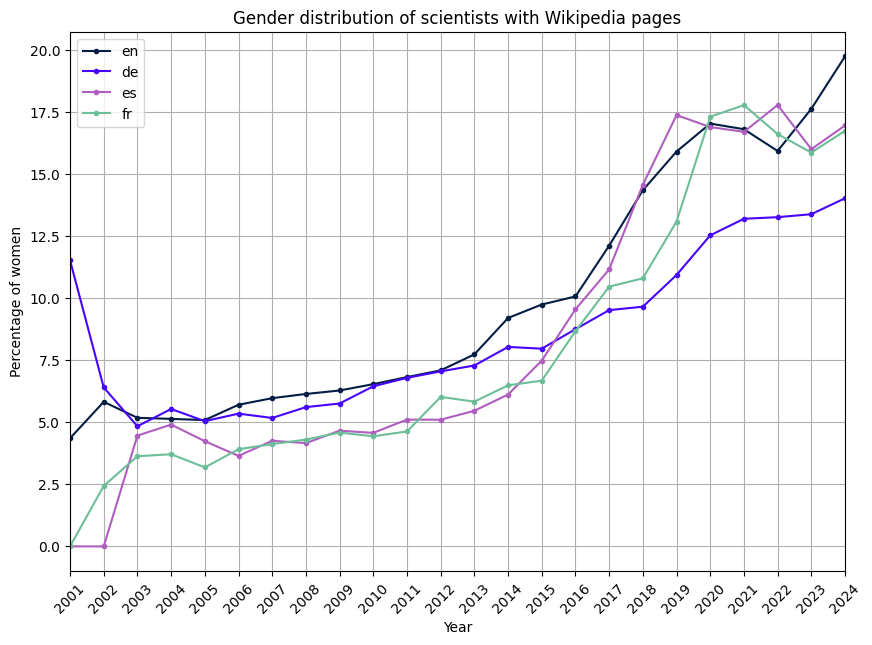

In [32]:
plt.figure(figsize=(10, 7))
plt.plot(years, list(genderdist_en.values()), label='en', color='#031D44',marker='.')
plt.plot(years, list(genderdist_de.values()), label='de', color='#4705FB',marker='.')
plt.plot(years, list(genderdist_es.values()), label='es', color='#AF5EC0',marker='.')
plt.plot(years, list(genderdist_fr.values()), label='fr', color='#6DBE98',marker='.')

plt.xlabel('Year')
plt.ylabel('Percentage of women')
plt.title('Gender distribution of scientists with Wikipedia pages')

plt.xlim(min(years) + 1, max(years) - 1)

plt.legend()
plt.grid(True)
plt.xticks(ticks=list(years), labels=list(years), rotation=45)

plt.show()


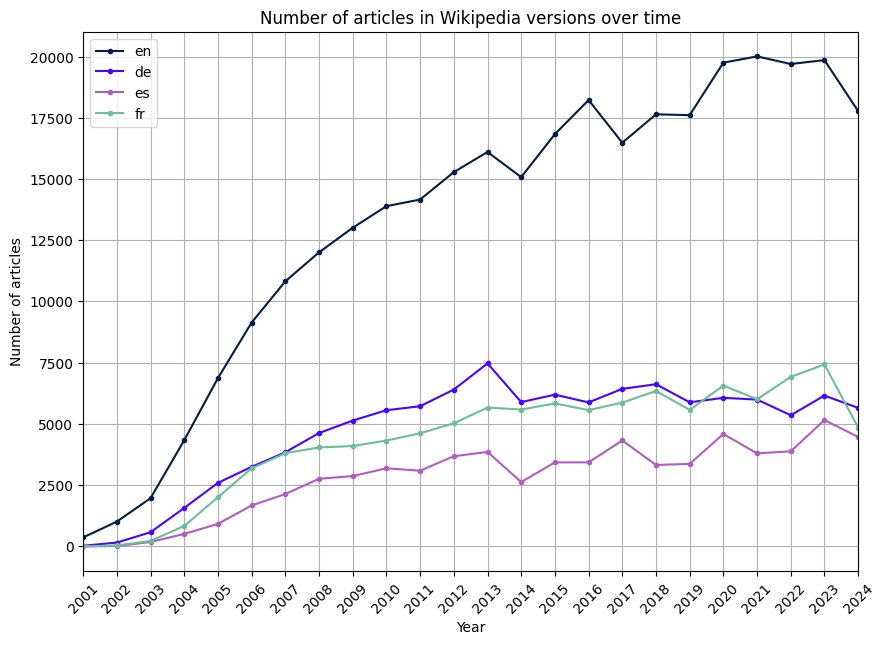

In [42]:
plt.figure(figsize=(10, 7))
plt.plot(years, list(total_en.values()), label='en', color='#031D44',marker='.')   
plt.plot(years, list(total_de.values()), label='de', color='#4705FB',marker='.')
plt.plot(years, list(total_es.values()), label='es', color='#AF5EC0',marker='.')
plt.plot(years, list(total_fr.values()), label='fr', color='#6DBE98',marker='.')

plt.xlabel('Year')
plt.ylabel('Number of articles')
plt.title('Number of articles in Wikipedia versions over time')

plt.xlim(min(years) + 1, max(years) - 1)

plt.legend()
plt.grid(True)
plt.xticks(ticks=list(years), labels=list(years), rotation=45)

plt.show()
